In [90]:
from scipy.io import wavfile
import scipy.linalg

import numpy as np
import matplotlib.pyplot as plt

# loading clean and noisy files
we can reverse their role by exchanging the path

In [414]:
sr, cleanData = wavfile.read('/home/sneha/Downloads/speech/speechFiles/clean.wav')
sr, noisyData = wavfile.read('/home/sneha/Downloads/speech/speechFiles/noisy.wav')

# definition of spectogram function

In [429]:
def spectrogram(X,sr):
   
    #25ms window is equal to 25ms*16khz=400 sample window
    window=25*10**(-3)*sr
    
    #10 ms hop is equal to 10ms*16khz=160 sample hop
    hop=10*10**(-3)*sr
    
    FFT=256
    
    # calculate number of frames
    frames = 1 + np.int32(np.floor((len(X) - window) / float(hop)))
    Y = np.zeros((frames, FFT), np.complex64)
    
    #finding FFT features for each frame
    for i in range(frames):
        start=int(i*hop)
        end=int(start+window)
        z = X[start: end] * np.hamming(window)
        Y[i] = np.fft.fft(z, n=FFT)
    
            
    # obtain log of the absolute values of the features and selected only 128 out of 256
    Y= np.log(np.abs(Y[:, :128]))
  
    return Y

# feature data for clean and noisy files

In [430]:
clean_X = spectrogram(cleanData,sr)
noisy_X = spectrogram(noisyData,sr)


# whitening projection matrix calculation for input matrx X

In [422]:
def whitening(X):
    Sx=np.cov(X.T)
    values,vectors=scipy.linalg.eigh(Sx)
    l = np.diag(1/(values**0.5))
    A=l @ vectors.T
    return A


# applying whitening projection matrix for clean data to both clean and noisy data

In [423]:
W = whitening(clean_X)
clean_white =  W@clean_X.T
clean_white=clean_white.T

noisy_white = W @ noisy_X.T
noisy_white=noisy_white.T

# finding covariance for clean data and whitened clean data

In [431]:
clean_X_cov = np.cov(clean_X.T)
clean_white_cov = np.cov(clean_white.T)



# finding covriance matrix for noisy data and whitened noisy data

In [432]:
noisy_X_cov = np.cov(noisy_X.T)
noisy_white_cov = np.cov(noisy_white.T)

# color mapping covariance matrix of clean and whitened clean data for better visualisation

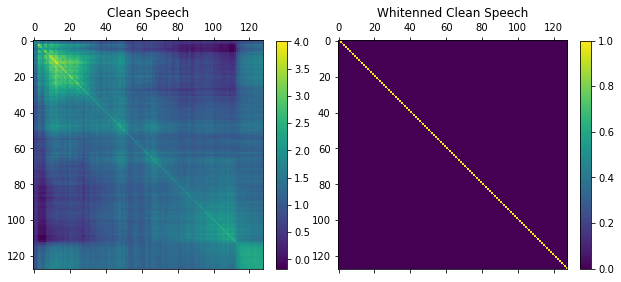

In [438]:
from matplotlib import colors
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
cmap = colors.ListedColormap(['green', 'red'])
f1 = ax[0].matshow(clean_X_cov)
f2 = ax[1].matshow(clean_white_cov)
ax[0].set_title('Clean Speech')
ax[1].set_title('Whitenned Clean Speech')
fig.colorbar(f1, ax=ax[0], fraction=0.045)
fig.colorbar(f2, ax=ax[1], fraction=0.045)

In [442]:
# visualising covariance data after normalising covarinace matrix values between 0 and 1

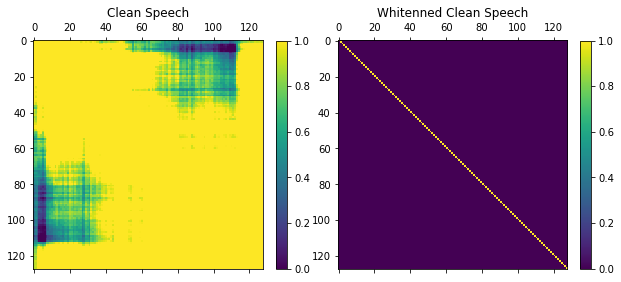

In [443]:

fig, ax = plt.subplots(1, 2, figsize=(10, 8))

f1 = ax[0].matshow(clean_X_cov,vmin=0, vmax=1)
f2 = ax[1].matshow(clean_white_cov, vmin=0, vmax=1)
ax[0].set_title('Clean Speech')
ax[1].set_title('Whitenned Clean Speech')
fig.colorbar(f1, ax=ax[0], fraction=0.045)
fig.colorbar(f2, ax=ax[1], fraction=0.045)

# color mapping covriance matrix of noisy data and whitened noisy data

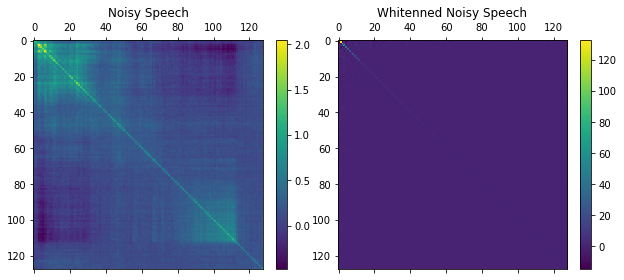

In [444]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
f1 = ax[0].matshow(noisy_X_cov)
f2 = ax[1].matshow(noisy_white_cov)
ax[0].set_title('Noisy Speech')
ax[1].set_title('Whitenned Noisy Speech')
fig.colorbar(f1, ax=ax[0], fraction=0.045)
fig.colorbar(f2, ax=ax[1], fraction=0.045)

# visualising noisy data after normalising covariance matrix values between 0 and 1

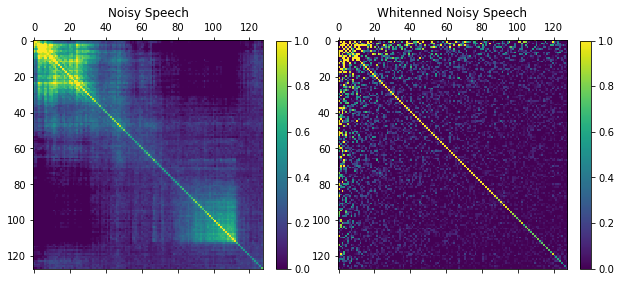

In [445]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
f1 = ax[0].matshow(noisy_X_cov,vmin=0,vmax=1)
f2 = ax[1].matshow(noisy_white_cov,vmin=0,vmax=1)
ax[0].set_title('Noisy Speech')
ax[1].set_title('Whitenned Noisy Speech')
fig.colorbar(f1, ax=ax[0], fraction=0.045)
fig.colorbar(f2, ax=ax[1], fraction=0.045)

# calculating mean of absolute value of non diagonal entries of sample covariance matrix of whitened data

In [458]:


clean_white_abs_val = np.mean(np.abs(clean_white_cov - np.diag(np.diag(clean_white_cov))))
noisy_white_abs_val = np.mean(np.abs(noisy_white_cov - np.diag(np.diag(noisy_white_cov))))
clean_white_abs_val, noisy_white_abs_val

(2.7406436930378272e-15, 0.1514521705970452)

# observations

# when whitening projection matrix calculated on Clean Data
1.the average of absolute value of non diagonal entries of sample covariance matrix of 
CLEAN whitened data become ZERO. which means all the 128 features became uncorrelated
on the other hand the average of absolute value of non diagonal entries of sample covariance matrix of 
NOISY whitened data did not become zero. which mean some features were still correlated
  
2.this can be seen by the covariance matrix color mapping the covariance matrix of CLEAN WHITENED
data became IDENTITY, whereas covariance matrix of NOISY WHITNED data did not became identity 
but the features definitly became less correlated

# when whitening projection matrix calculated on noisy data
1.the average of absolute value of non diagonal entries of sample covariance matrix of 
NOISY whitened data become ZERO. which means all the 128 features became uncorrelated
on the other hand the average of absolute value of non diagonal entries of sample covariance matrix of 
CLEAN whitened data did not become zero. which mean some features were still correlated

2.this can be seen by the covariance matrix color mapping the covariance matrix of NOISY WHITENED
data will become IDENTITY, whereas covariance matrix of CLEAN WHITNED data will not became identity 
but the features definitly will become less correlated


